In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize

In [33]:
image=cv2.imread('xray1.jpeg')
cv2.imshow("Data",image)

In [34]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [35]:
from astropy.convolution import Gaussian2DKernel
from photutils.background import Background2D, MedianBackground
from photutils.segmentation import detect_threshold, detect_sources, deblend_sources
data = gray_image
threshold = detect_threshold(data, nsigma=2.)

In [36]:
from astropy.stats import gaussian_fwhm_to_sigma
sigma = 3.0 * gaussian_fwhm_to_sigma  # FWHM = 3.
kernel = Gaussian2DKernel(sigma, x_size=3, y_size=3)
kernel.normalize()
npixels = 5
segm = detect_sources(data, threshold, npixels=npixels, kernel=kernel)
segm_deblend = deblend_sources(data, segm, npixels=npixels,kernel=kernel, nlevels=32,contrast=0.001)

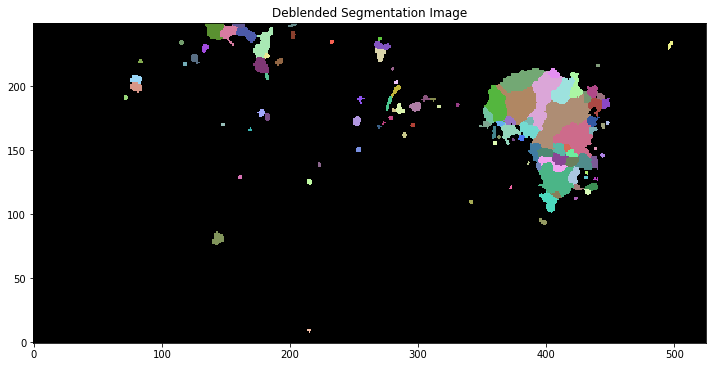

In [37]:
norm = ImageNormalize(stretch=SqrtStretch())
fig, ax = plt.subplots(1, 1, figsize=(10, 6.5))
cmap = segm_deblend.make_cmap(seed=123)
ax.imshow(segm_deblend, origin='lower', cmap=cmap, interpolation='nearest')
ax.set_title('Deblended Segmentation Image')
plt.tight_layout()

In [38]:
from photutils.segmentation import SourceCatalog
cat = SourceCatalog(data, segm_deblend)
tbl = cat.to_table()
tbl['xcentroid'].info.format = '.2f' 
tbl['ycentroid'].info.format = '.2f'
tbl['kron_flux'].info.format = '.2f'
print(tbl)

UFuncTypeError: Cannot cast ufunc 'subtract' output from dtype('float64') to dtype('uint8') with casting rule 'same_kind'